In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:

adelaide_df = pd.read_csv("Data_sets/Adelaide_Data.csv")
adelaide_df.columns = [f'X{i+1}' for i in range(16)] + [f'Y{i+1}' for i in range(16)] + [f'P{i+1}' for i in range(16)] + ['Power_all']

adelaide_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
0,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
1,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
2,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
3,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577
4,370.1551,438.7171,222.3375,153.1610,429.7656,478.7805,303.1690,448.9657,98.8592,29.9884,...,97335.9836,70670.4876,57081.2420,86038.3420,83643.1803,97737.5596,85684.3216,57476.9499,85025.9075,1308546.042


In [3]:
adelaide_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
count,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.00000,71998.000000,71998.000000,71998.000000,71998.000000,...,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,7.199800e+04
mean,281.278434,279.316799,294.138170,263.820014,290.190835,246.81052,252.474533,322.613080,280.746168,288.405246,...,88436.614802,88332.383742,87564.257977,88660.580440,88425.330170,87185.332906,87704.044108,89191.016479,88471.341006,1.410073e+06
std,178.320730,178.037942,182.138518,194.869224,179.635262,191.37862,178.340115,178.435158,190.274938,178.158481,...,10108.714997,10156.727576,10174.942637,10515.851087,10489.615606,10565.592524,10430.137566,10442.295312,10572.653000,5.600749e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,51444.747000,51304.021600,49409.891500,49814.045300,51660.410600,50205.352800,51141.599700,50628.552800,47273.983600,1.191378e+06
25%,117.006825,116.477225,116.269200,76.570500,123.092425,67.49445,89.111750,166.917500,103.627400,126.430400,...,81445.599325,81102.055325,80546.816775,80803.156425,80789.259225,79083.946125,79920.262800,81584.169325,80400.514400,1.371209e+06
50%,282.731850,280.674850,315.467050,247.231900,286.194300,214.91815,233.673750,356.337700,267.173600,288.203900,...,90310.888500,90083.739600,88073.889100,91008.722450,89940.659550,87663.436400,89004.129150,92113.493100,90698.590550,1.402170e+06
75%,437.294500,444.122000,455.154275,444.659350,460.148200,433.31165,408.797950,481.671800,464.014100,448.372850,...,97418.742850,97448.086300,97336.088325,97813.297875,97720.390650,97475.936600,97501.542600,98072.961125,97663.106325,1.446065e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.00000,566.000000,566.000000,566.000000,566.000000,...,105790.374500,105526.299600,105420.107400,105395.279300,105539.986600,105447.760000,105301.202500,104602.318800,105390.327100,1.583052e+06


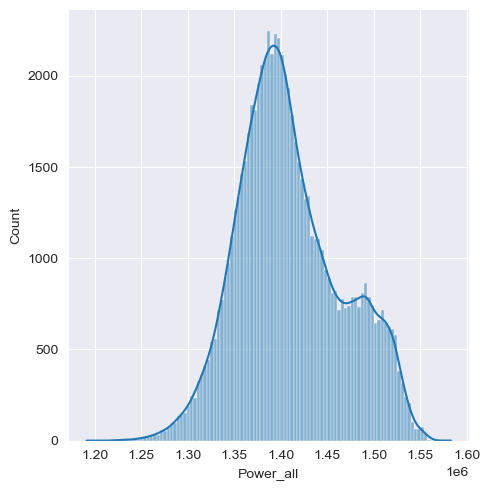

In [4]:
sns.displot(adelaide_df['Power_all'], kde=True)

In [5]:
# Usunięcie wszystkich kolumn Pi (P1 do P16)
columns_to_remove = [f"P{i}" for i in range(1, 17)]
adelaide_new_df = adelaide_df.drop(columns=columns_to_remove,errors='ignore')

adelaide_df= adelaide_new_df
print("Kolumny po usunięciu P1-P16:", adelaide_df.columns)

adelaide_df.head(10)

Kolumny po usunięciu P1-P16: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16',
       'Power_all'],
      dtype='object')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Power_all
0,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,248.7212,415.6457,410.1439,156.3712,532.9900,280.7516,559.2803,208.7441,531.3943,1340929.765
1,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,498.6277,435.2397,35.5588,148.9206,48.0585,317.9832,26.8732,483.0186,359.0875,1352031.511
2,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,217.2239,562.7245,347.2173,0.0000,272.3906,178.4930,317.5044,235.5983,19.6762,1396754.375
3,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,536.6741,143.3888,48.6452,109.5254,377.3113,530.8384,463.1129,42.6895,367.9045,1355708.577
4,370.1551,438.7171,222.3375,153.1610,429.7656,478.7805,303.1690,448.9657,98.8592,29.9884,...,423.5370,256.5259,161.7823,0.0000,264.1742,417.7013,349.9758,155.8266,254.7675,1308546.042
5,538.5188,76.2676,0.0000,542.6561,549.9406,105.8695,1.9156,45.2259,135.5680,437.2929,...,69.9570,525.0923,476.2377,419.2540,15.7628,170.1425,53.9149,551.3931,43.4459,1424838.348
6,565.6854,362.3064,0.0000,146.6763,241.4689,501.8493,397.8953,441.2057,0.0000,105.0475,...,465.9368,207.3574,135.7640,182.3730,411.7426,565.6854,393.2962,155.4133,0.0000,1406678.753
7,565.6854,305.7379,0.0000,203.2449,298.0374,445.2808,341.3268,471.9403,56.5685,161.6161,...,409.3683,263.9260,192.3325,238.9415,355.1741,509.1169,336.7277,206.8533,0.0000,1341132.157
8,325.1318,22.8951,0.0000,290.1721,565.6854,162.4381,58.4841,189.0976,339.4113,444.4588,...,126.5255,546.7687,475.1753,521.7842,72.3314,226.2742,53.8849,479.9656,258.2586,1393841.532
9,441.1397,505.9720,264.0548,58.6973,5.3679,565.6854,515.6628,365.4379,166.4490,189.7841,...,475.4075,115.5771,49.1770,191.4875,391.8537,388.1246,447.2852,18.7971,250.9077,1374574.898


In [7]:
has_nan = adelaide_df.isnull().values.any()
print("Nan:", has_nan)

adelaide_df = adelaide_df.dropna()
adelaide_df.isnull().any(axis=1)

Nan: False


0        False
1        False
2        False
3        False
4        False
         ...  
71993    False
71994    False
71995    False
71996    False
71997    False
Length: 71998, dtype: bool

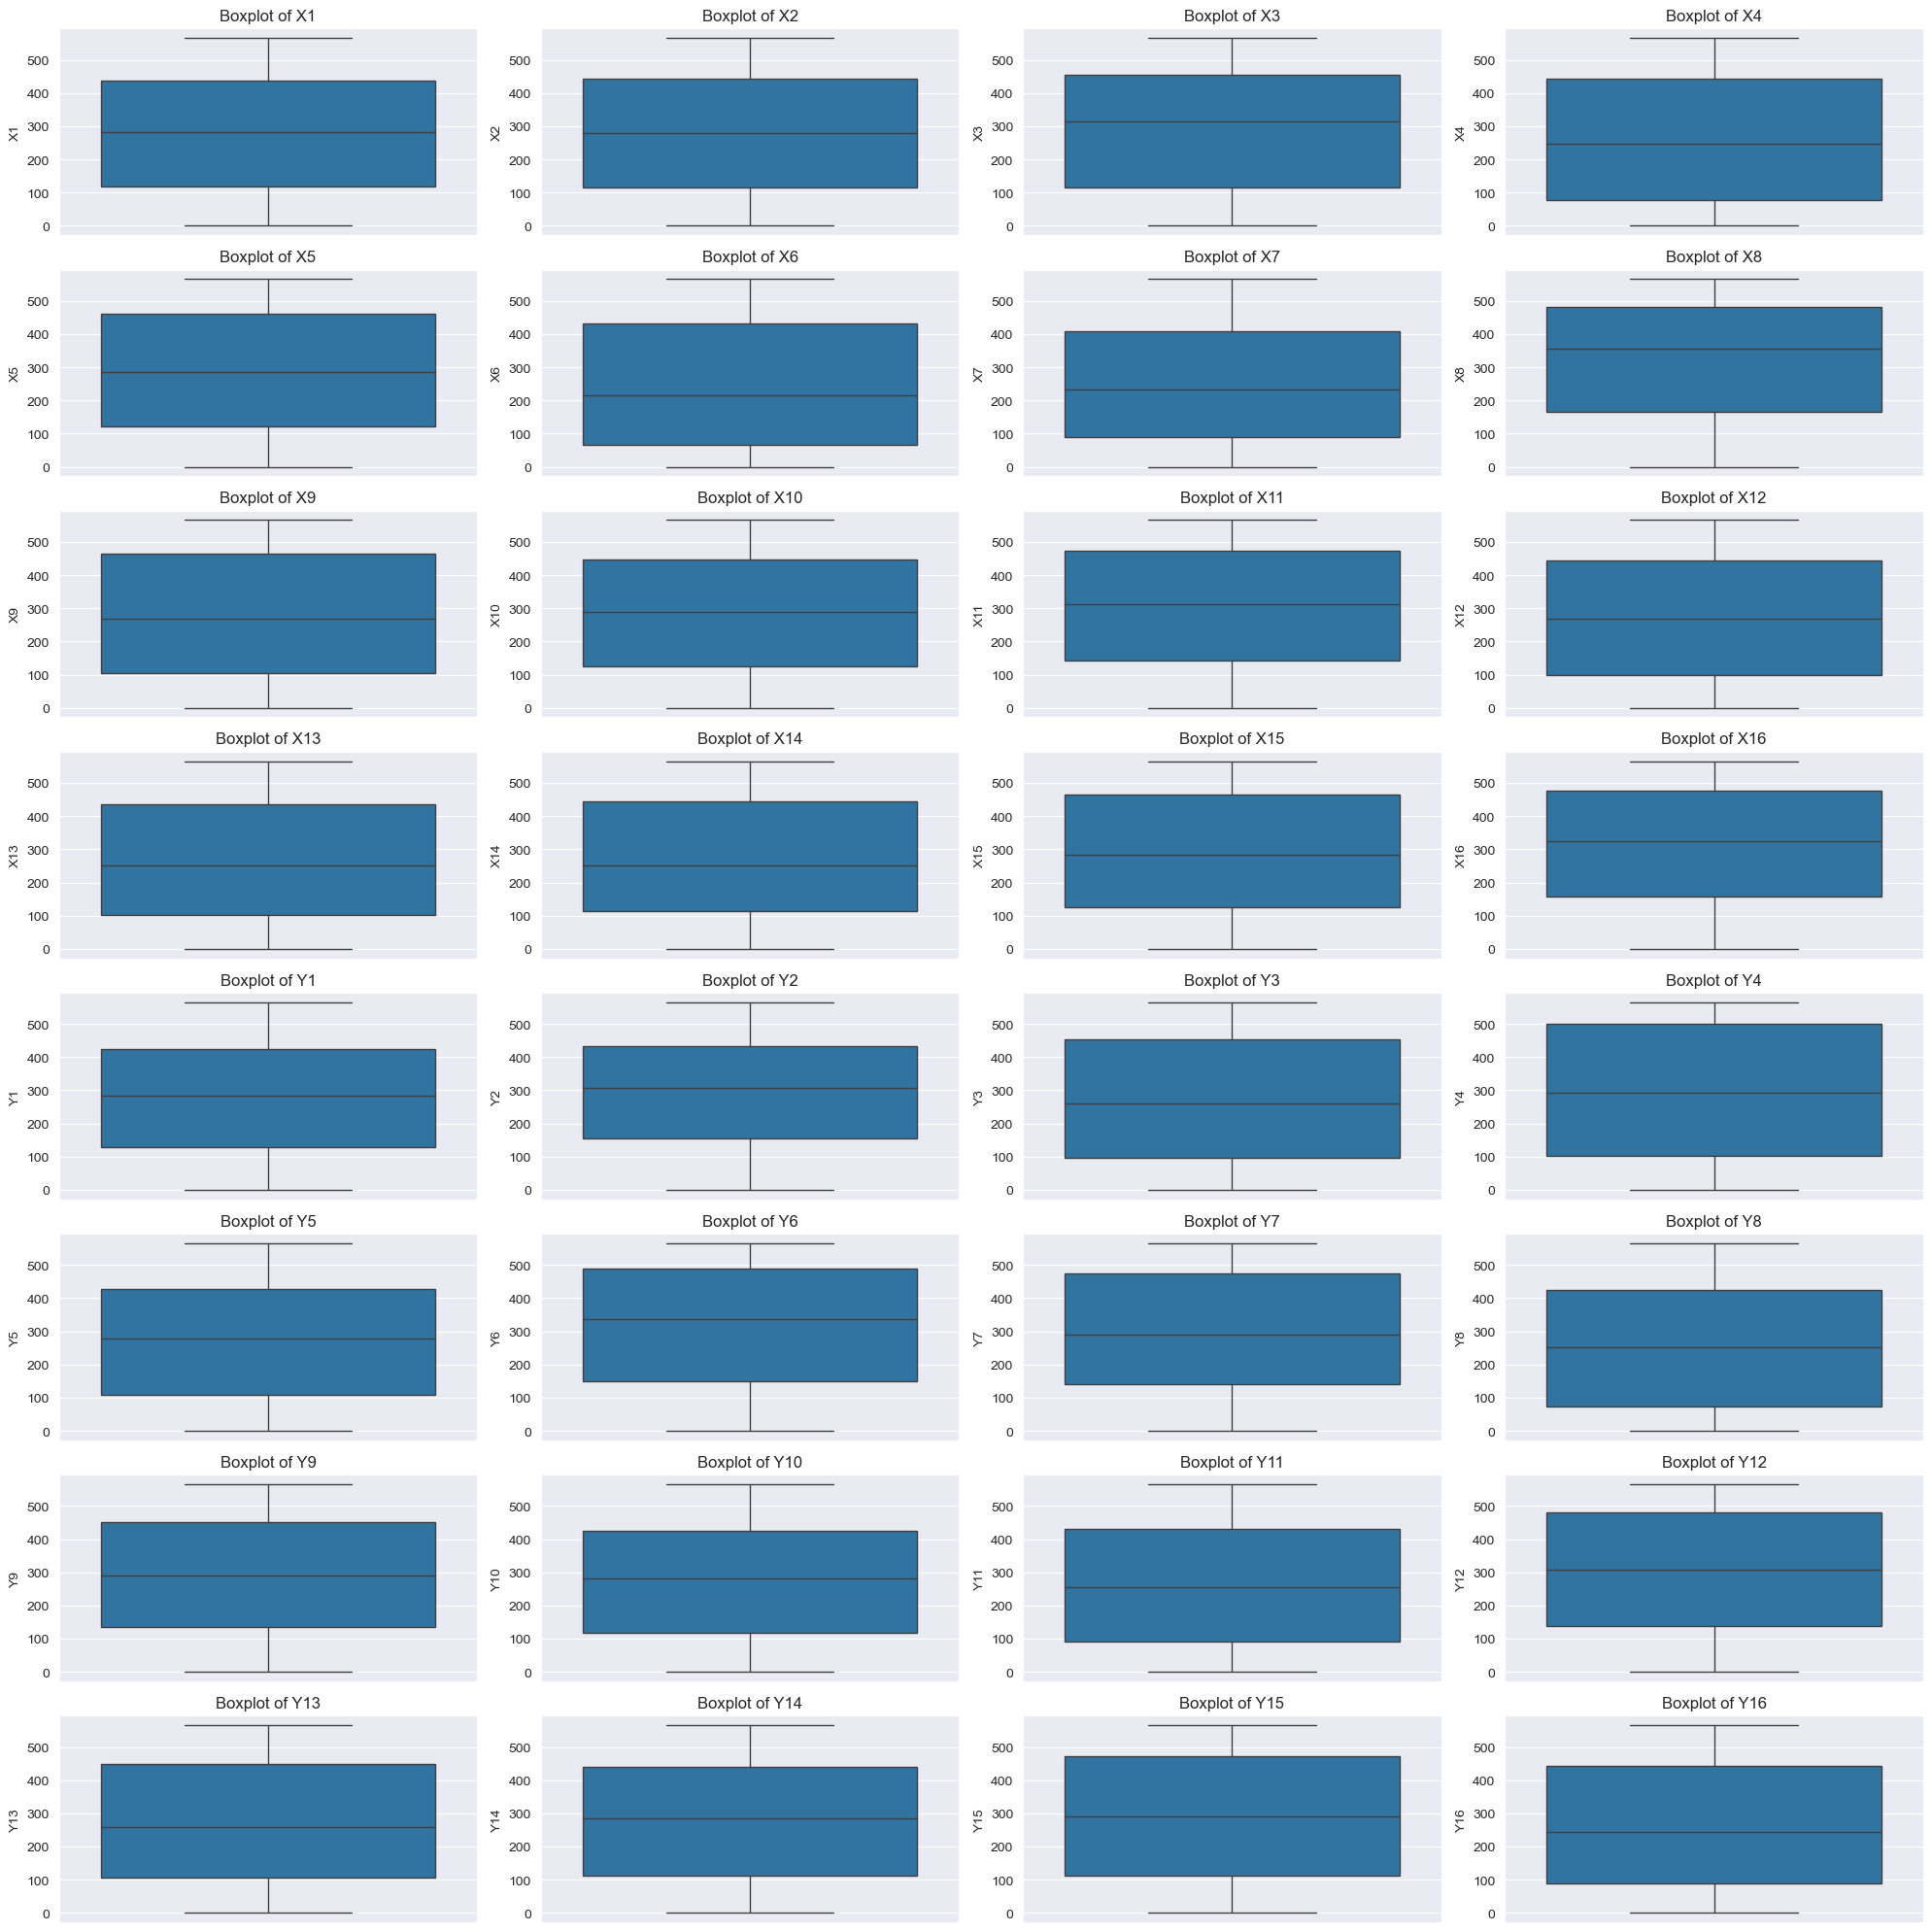

In [8]:
columns_to_plot = [f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(y=adelaide_df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

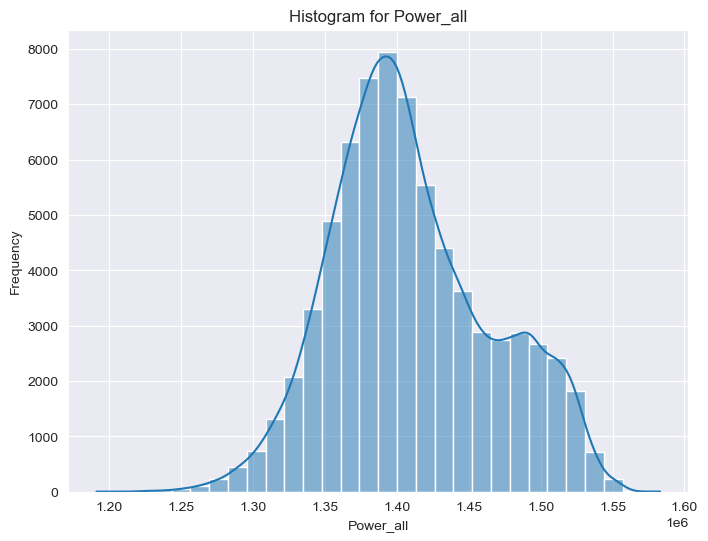

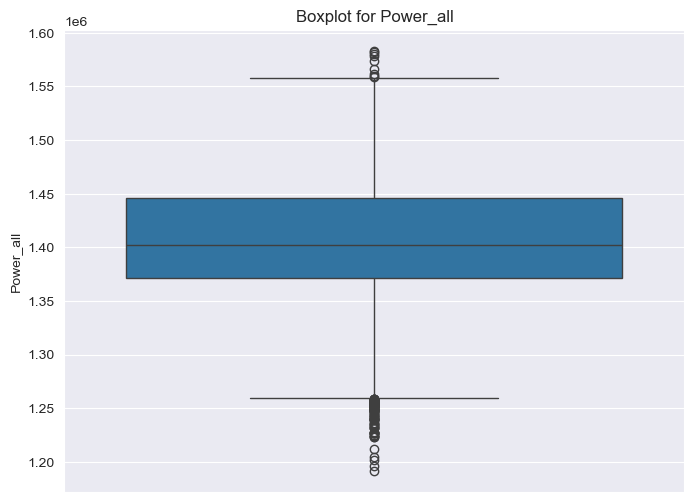

In [9]:
# Histogram dla kolumny Power_all


plt.figure(figsize=(8, 6))
sns.histplot(adelaide_df['Power_all'], kde=True, bins=30)
plt.title('Histogram for Power_all')
plt.xlabel('Power_all')
plt.ylabel('Frequency')
plt.show()

# Boxplot dla kolumny Power_all
plt.figure(figsize=(8, 6))
sns.boxplot(y=adelaide_df['Power_all'])
plt.title('Boxplot for Power_all')
plt.ylabel('Power_all')
plt.show()


In [10]:
upper_limit = adelaide_df['Power_all'].mean() + 3 * adelaide_df['Power_all'].std()
lower_limit = adelaide_df['Power_all'].mean() - 3 * adelaide_df['Power_all'].std()


print(upper_limit)
print(lower_limit)

final_df_new = adelaide_df.loc[(adelaide_df['Power_all'] < upper_limit) & (adelaide_df['Power_all'] > lower_limit)]


print("Liczba wierszy po filtracji:", len(final_df_new))
print("Oryginalna liczba wierszy:", len(adelaide_df))

adelaide_df = final_df_new


1578095.756402539
1242050.8004700965
Liczba wierszy po filtracji: 71958
Oryginalna liczba wierszy: 71998


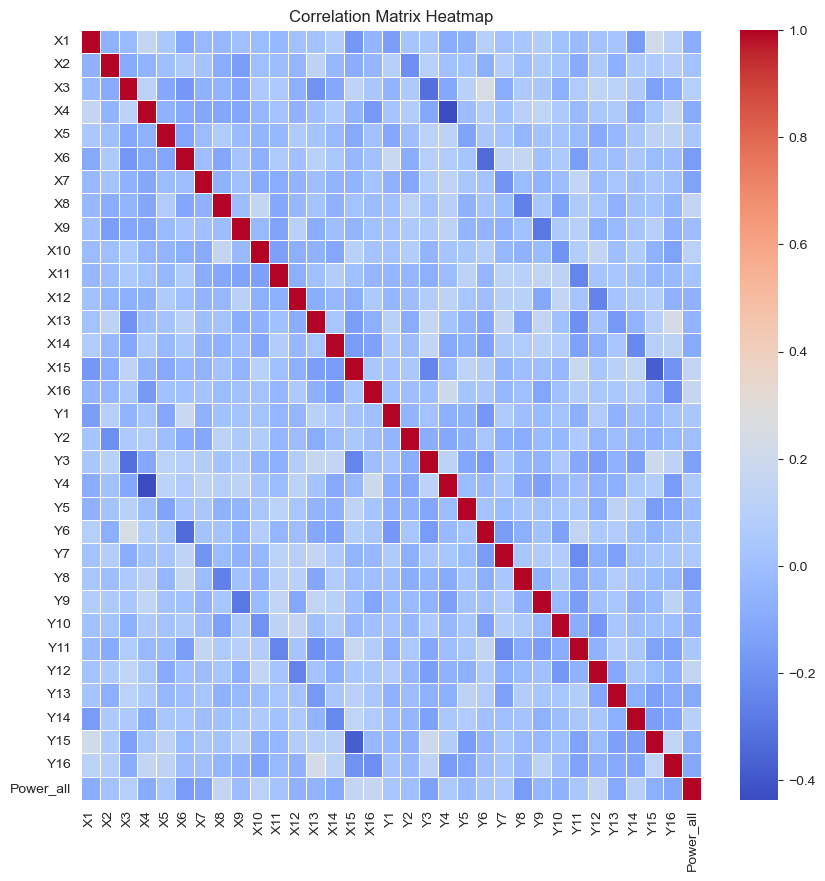

In [11]:
correlation_matrix = adelaide_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

(array([ 2.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,  0.,  2.,  0.,  4.,
         4.,  4.,  4.,  6.,  4., 12., 22., 32., 12., 48., 34., 50., 70.,
        52., 48., 56., 66., 58., 78., 56., 58., 60., 30., 36., 32., 32.,
        28., 14., 20.,  6.,  4.,  0.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 33.]),
 array([-0.43708168, -0.42271087, -0.40834005, -0.39396923, -0.37959842,
        -0.3652276 , -0.35085678, -0.33648597, -0.32211515, -0.30774433,
        -0.29337352, -0.2790027 , -0.26463188, -0.25026107, -0.23589025,
        -0.22151943, -0.20714861, -0.1927778 , -0.17840698, -0.16403616,
        -0.14966535, -0.13529453, -0.12092371, -0.1065529 , -0.09218208,
        -0.07781126, -0.06344045, -0.04906963, -0.03469881, -0.020328

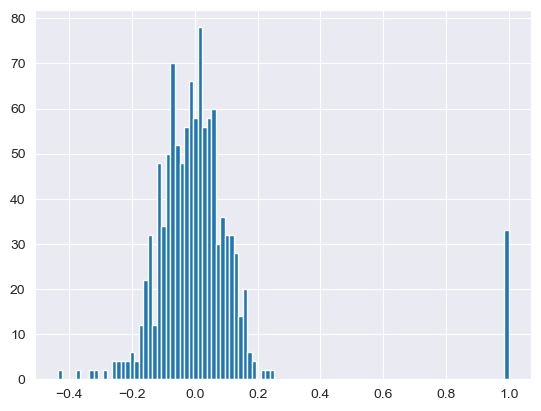

In [12]:
tab=np.array(correlation_matrix).reshape(-1)
plt.hist(tab, bins=100)

In [17]:
# Przygotowanie cech (X) i etykiety (y)
X = adelaide_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y = adelaide_df["Power_all"]

# Podział na zestawy train, validation i test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 10% val, 10% test

# Informacja o rozmiarach zbiorów
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 50338 samples
Validation set: 10787 samples
Test set: 10787 samples


In [18]:
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)

# Obliczanie MSE, RMSE
mse_lr, rmse_lr = calculate_rmse(y_val, y_val_pred_lr)

# Obliczanie współczynnika determinacji R²
r2_lr = lr.score(X_val, y_val)  # R² dla modelu

# Wyświetlanie wyników
print(f"Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")


Linear Regression - MSE: 2320806574.8596044, RMSE: 48174.750387102205, R²: 0.13577600382841748


In [19]:

# Tworzenie modelu XGBoost
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.11,
    max_depth=10,
    random_state=42,
    eval_metric="rmse"  # Tutaj definiujemy metrykę
)

# Trenowanie modelu z zestawem walidacyjnym
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  
    verbose=True  # Wyświetlanie postępu
)

# Predykcja na danych testowych
y_pred = model.predict(X_test)

# Obliczanie MSE, RMSE i R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - MSE: {mse}, RMSE: {rmse}, R²: {r2}")


[0]	validation_0-rmse:48447.81898	validation_1-rmse:48323.48251
[1]	validation_0-rmse:45262.11813	validation_1-rmse:45325.79351
[2]	validation_0-rmse:42486.78548	validation_1-rmse:42767.46548
[3]	validation_0-rmse:39997.42955	validation_1-rmse:40505.19167
[4]	validation_0-rmse:37706.44780	validation_1-rmse:38456.91371
[5]	validation_0-rmse:35697.62138	validation_1-rmse:36686.47297
[6]	validation_0-rmse:33825.05190	validation_1-rmse:35070.50121
[7]	validation_0-rmse:32224.19485	validation_1-rmse:33729.00975
[8]	validation_0-rmse:30848.02766	validation_1-rmse:32591.80313
[9]	validation_0-rmse:29496.39944	validation_1-rmse:31480.20735
[10]	validation_0-rmse:28364.51385	validation_1-rmse:30569.29495
[11]	validation_0-rmse:27311.27702	validation_1-rmse:29767.10887
[12]	validation_0-rmse:26347.25618	validation_1-rmse:29077.57110
[13]	validation_0-rmse:25534.78049	validation_1-rmse:28493.51420
[14]	validation_0-rmse:24742.84290	validation_1-rmse:27960.51671
[15]	validation_0-rmse:24161.92106	

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definicja hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200],       # Zmniejszono do dwóch wartości
    'max_depth': [3, 5],             # Zmniejszono do dwóch wartości
    'learning_rate': [0.1,0.2]     # Zmniejszono do dwóch wartości
}


# Tworzenie modelu Gradient Boosting
model = GradientBoostingRegressor(random_state=42)

# Grid Search z walidacją krzyżową
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # używamy MSE jako funkcji kosztu
    cv=2,  # liczba podziałów do walidacji krzyżowej
    verbose=1,
    n_jobs=-1  # równoległe przetwarzanie
)

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepszy model i jego hiperparametry
best_model = grid_search.best_estimator_
print("Najlepsze hiperparametry:", grid_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
rmse = np.sqrt(mse)
print(f"Gradient Boosting - MSE: {mse}, RMSE: {rmse}, R^2: {r2}")


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Najlepsze hiperparametry: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting - MSE: 390843132.5258998, RMSE: 19769.752970785947, R^2: 0.854457490112813
